# Lab 4: Evaluation and Multi-Layer Perceptron
## Group Members: Andrew Breslauer, Camilo Villamizar
<p>During this lab, we will be implementing our own version of sci-kit learn's 

## Part 1: Preparation

### 1.1: Business Case
<p>Dataset comes from Kaggle user piyushgoyal443's Red Wine dataset(https://www.kaggle.com/piyushgoyal443/red-wine-dataset). Each wine type is classified by various observable statistics, such as acidity, chlorides, sugar, and pH, among others. Then, each wine is ranked between 0 (very bad) and 10 (very good) by at least 3 wine "experts", with the median being the final score for each wine to mitigate outliers.

This type of data could be useful for the casual wine enthusiast as well as wine retailers. The casual wine enthusiast could attempt to find the best wine quality for pricingor find better quality wines than the ones they currently enjoy, while the wine retailers could adjust prices to match quality and update their inventory. This system is an offline system, so a higher accuracy score is much more important than speed</p>

### 1.2: Prepare the Data

In [1]:
import numpy as np
import pandas as pd

print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)

df = pd.read_csv("red-wine-dataset/wineQualityReds.csv")
df.head()

Pandas: 0.25.1
Numpy: 1.16.4


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


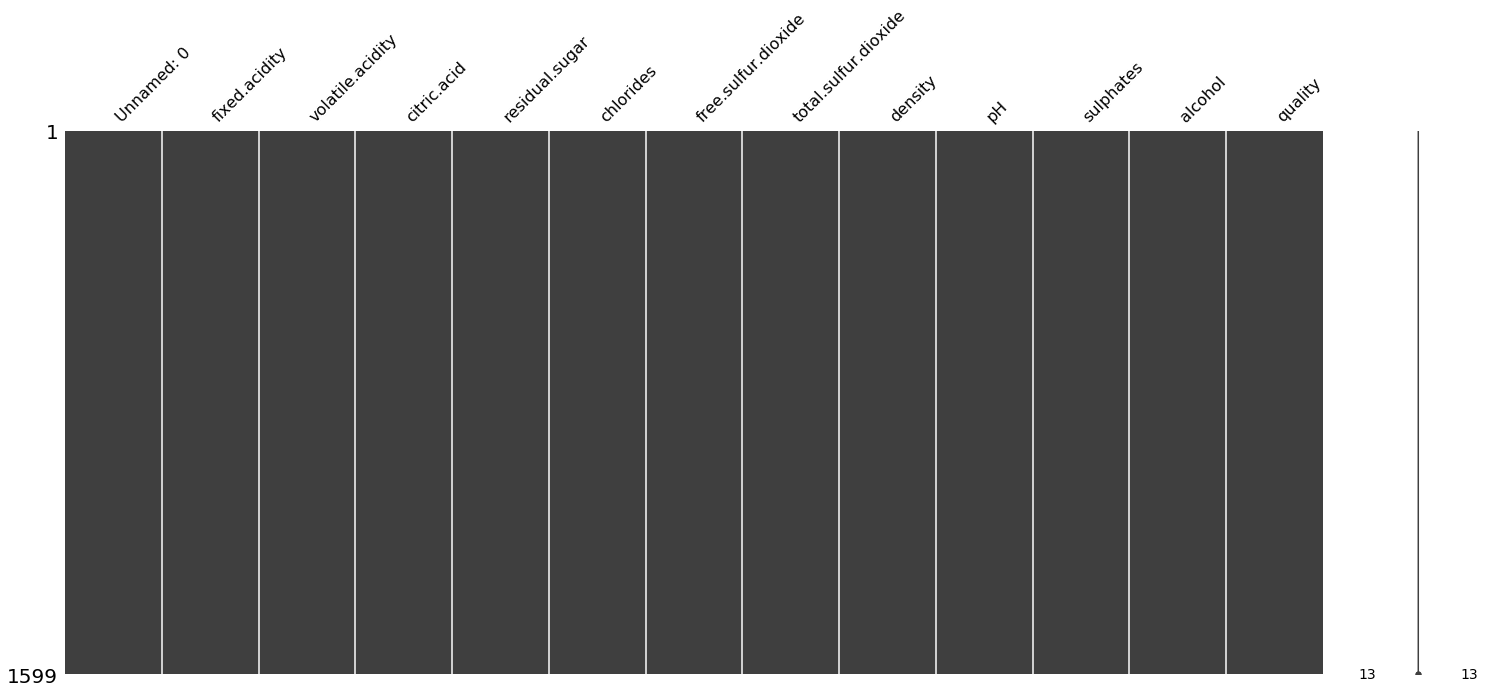

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn
mn.matrix(df.sort_values(by=["alcohol", "pH", "chlorides", "sulphates"]))

<p><b>Yay! No missing values!</b></p>
<p>Our target class (quality) is an int that ranges between 3 and 8, so there are essentially 6 possible results for the target class. (3, 4, 5, 6, 7, 8) There is no missing data from any of the classes, so there is no need to purge and/or impute any data.</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


<p>All the data is already either floats or integers, so it is already properly prepared.</p>

## Part 2: Evaluation

### 2.1: What metrics define the algorithm's performance?

In [ ]:
# Choose between LogLoss, Confusion Matrix, f-score -- Ask if he has any preference

We are using f1 score. We care more about the correctly identified objects than we do about inaccuracies, but we care about both enough for both facets (precision and recall) of the f1 score to be present.

### 2.2: Divide into Training and Testing data

<p>Splitting the data into training and testing data with an 80-20 split means that there are 320 datapoints to be used for testing, which is enough with 6 target classes (3-8 as a quality score). Although more datapoints would be helpful to further test the accuracy of the perceptron, we don't want to take any more away from the training data than we have to, so this split is best.</p>

In [9]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279, 1)
(320, 11)
(320, 1)


## Part 3: Modeling

### 3.1: Create the custom implementation of the multi-layer perceptron
<p>When instantiaed, use a selectable phi function for the initial layer (sigmoid or linear)</p>
<p>Use a selectable cost function (quadratic or cross entropy)</p>
<p>Add support for x number of hidden layers, chosen by the user</p>

### 3.2: Tune the hyper-parameters and analyze the results using chosen metrics. Visualize evaluation metric(s) vs hyper-parameters.

### 3.3: Visualize magnitude of gradients in each layer.
<p>Do the gradients stay consistent in each layer?</p>

## Part 4: Exceptional Work